# Stock Model Testing 0 (ChatGPT)
**Yahoo Finance API & TensorFlow Scratch**

In [142]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import yfinance_test
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**yfinance testing**

stock_list: ['AMZN']
[*********************100%***********************]  1 of 1 completed
data fields downloaded: {'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Open'}


<Axes: xlabel='Date', ylabel='Close'>

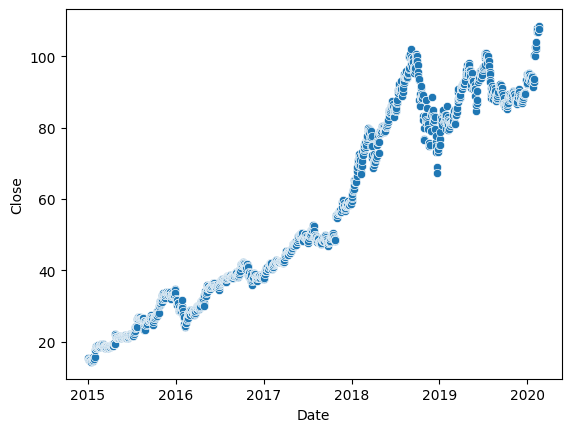

In [143]:
stock_data = yfinance_test.get_stock_data()
#stock_data.head()
sns.scatterplot(data=stock_data, x='Date', y='Close')

**Stock Testing**

Hold signal


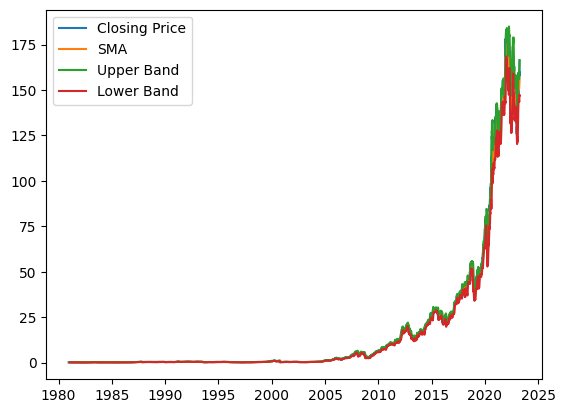

In [144]:
import matplotlib.pyplot as plt

# Load data for a stock
stock = yf.Ticker("AAPL")
data = stock.history(period="max")

# Calculate Bollinger Bands
window_size = 20
data['SMA'] = data['Close'].rolling(window=window_size).mean()
data['STD'] = data['Close'].rolling(window=window_size).std()
data['Upper'] = data['SMA'] + (data['STD'] * 2)
data['Lower'] = data['SMA'] - (data['STD'] * 2)

# Make a prediction based on the Bollinger Bands
last_close = data['Close'][-1]
last_upper = data['Upper'][-1]
last_lower = data['Lower'][-1]

if last_close > last_upper:
    print("Sell signal")
elif last_close < last_lower:
    print("Buy signal")
else:
    print("Hold signal")

# Plot the Bollinger Bands and the stock's closing price
plt.plot(data.index, data['Close'], label='Closing Price')
plt.plot(data.index, data['SMA'], label='SMA')
plt.plot(data.index, data['Upper'], label='Upper Band')
plt.plot(data.index, data['Lower'], label='Lower Band')
plt.legend()
plt.show()

In [145]:

# Load data for a particular stock
stock = "AAPL"
df = yf.download(stock, start="2010-01-01", end="2022-04-01")

df.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3083 entries, 2010-01-04 to 2022-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3083 non-null   float64
 1   High       3083 non-null   float64
 2   Low        3083 non-null   float64
 3   Close      3083 non-null   float64
 4   Adj Close  3083 non-null   float64
 5   Volume     3083 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 168.6 KB


In [146]:
# Calculate Bollinger Bands for a 20-day moving average and 2 standard deviations
df['MA20'] = df['Close'].rolling(window=20).mean()
df['SD20'] = df['Close'].rolling(window=20).std()
df['UpperBand'] = df['MA20'] + (df['SD20'] * 2)
df['LowerBand'] = df['MA20'] - (df['SD20'] * 2)

# Create a new dataframe with features and target variable
new_df = pd.DataFrame()
new_df['Close'] = df['Close']
new_df['UpperBand'] = df['UpperBand']
new_df['LowerBand'] = df['LowerBand']
new_df = new_df.iloc[20:-20]

# Split data into training and testing sets
train_data, test_data = train_test_split(new_df, test_size=0.2, shuffle=False)

# Scale the data between 0 and 1
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Split the data into features and target variable
train_features, train_target = train_scaled[:, 1:], train_scaled[:, 0].reshape(train_scaled[:, 0].shape[0], 1)
test_features, test_target = test_scaled[:, 1:], test_scaled[:, 0]

# Reshape data for LSTM model
train_features = train_features.reshape(train_features.shape[0], train_features.shape[1], 1)
test_features = test_features.reshape(test_features.shape[0], test_features.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_features.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(train_features, train_target, epochs=100, batch_size=32, validation_split=0.2)

2023-04-03 17:11:04.492608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-03 17:11:04.494305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-03 17:11:04.495921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-04-03 17:11:04.797859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-03 17:11:04.801681: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-03 17:11:04.803676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

59/61 [============================>.] - ETA: 0s - loss: 0.0276

2023-04-03 17:11:09.305489: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-03 17:11:09.307145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-03 17:11:09.308814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

61/61 [==============================] - 5s 17ms/step - loss: 0.0269 - val_loss: 0.0296
Epoch 2/100
61/61 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.0105
Epoch 3/100
61/61 [==============================] - 0s 6ms/step - loss: 3.7441e-04 - val_loss: 0.0073
Epoch 4/100
61/61 [==============================] - 0s 6ms/step - loss: 3.6708e-04 - val_loss: 0.0063
Epoch 5/100
61/61 [==============================] - 0s 6ms/step - loss: 3.4063e-04 - val_loss: 0.0058
Epoch 6/100
61/61 [==============================] - 0s 5ms/step - loss: 3.2904e-04 - val_loss: 0.0053
Epoch 7/100
61/61 [==============================] - 0s 6ms/step - loss: 3.2531e-04 - val_loss: 0.0032
Epoch 8/100
61/61 [==============================] - 0s 5ms/step - loss: 3.1189e-04 - val_loss: 0.0036
Epoch 9/100
61/61 [==============================] - 0s 6ms/step - loss: 2.9884e-04 - val_loss: 0.0024
Epoch 10/100
61/61 [==============================] - 0s 5ms/step - loss: 3.0211e-04 - val_l

In [147]:
# Make predictions
predictions = model.predict(test_features)

# Inverse transform the predictions back to original scale
inv_predictions = scaler.inverse_transform(predictions)

# Inverse transform the test data back to original scale
inv_test_data = scaler.inverse_transform(test_scaled)

# Get the actual closing stock values
actual_closing = inv_test_data[:,0]

# Print RMSE and plot actual vs predicted values
rmse = np.sqrt(mean_squared_error(actual_closing, inv_predictions))
print("RMSE:", rmse)

plt.plot(test_data.index, actual_closing, label='Actual')
plt.plot(test_data.index, inv_predictions, label='Predicted')
plt.legend()
plt.show()

2023-04-03 17:11:43.853733: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-03 17:11:43.855657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-03 17:11:43.857016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20/20 [==============================] - 1s 2ms/step


ValueError: non-broadcastable output operand with shape (609,1) doesn't match the broadcast shape (609,3)

In [ ]:
test_data.shape

In [ ]:
train_data.shape

In [ ]:
predictions.shape

In [ ]:
test_features.shape

In [ ]:
test_features

In [ ]:
inv_predictions.shape

In [ ]:
predictions

In [ ]:
train_features.shape

**Need to figure out how to invert predictions variable**